In [1]:
import numpy as np 
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Loading the data
train_df = pd.read_csv('train.csv')
train_df.head(10)

id  Time        V1        V2        V3        V4        V5        V6  \
0   0   0.0  2.074329 -0.129425 -1.137418  0.412846 -0.192638 -1.210144   
1   1   0.0  1.998827 -1.250891 -0.520969 -0.894539 -1.122528 -0.270866   
2   2   0.0  0.091535  1.004517 -0.223445 -0.435249  0.667548 -0.988351   
3   3   0.0  1.979649 -0.184949 -1.064206  0.120125 -0.215238 -0.648829   
4   4   0.0  1.025898 -0.171827  1.203717  1.243900 -0.636572  1.099074   
5   5   0.0  1.052469  0.099592  1.077244  1.370024 -0.471625  0.238658   
6   6   0.0  1.206129  0.420150 -0.358910  1.037382  0.735224 -0.082449   
7   7   0.0 -1.074970 -0.297535 -0.884465  0.065341 -0.239956  0.349602   
8   8   0.0  2.154065 -0.000479 -2.125939 -0.121096  0.918473 -0.208507   
9   9   0.0  2.172667 -0.704020 -1.447412 -0.715805 -0.530117 -1.007526   

         V7        V8  ...       V21       V22       V23       V24       V25  \
0  0.110697 -0.263477  ... -0.334701 -0.887840  0.336701 -0.110835 -0.291459   
1 -1.029289  0.050198  ...  0.054848 -0.038367  0.133518 -0.461928 -0.465491   
2  0.948146 -0.084789  ... -0.326725 -0.803736  0.154495  0.951233 -0.506919   
3 -0.087826 -0.035367  ... -0.095514 -0.079792  0.167701 -0.042939  0.000799   
4 -0.938651  0.569239  ...  0.099157  0.608908  0.027901 -0.262813  0.257834   
5 -0.281837  0.055925  ... -0.013418  0.210670 -0.031069  0.131544  0.452867   
6  0.568558 -0.158037  ... -0.366513 -1.113867  0.042265 -0.819477  0.473615   
7  1.756880  0.054202  ...  0.624183  0.908389 -0.233799 -0.457045  0.551736   
8  0.226055 -0.236828  ...  0.243716  0.780992 -0.148060 -0.280708  0.507044   
9 -0.436662 -0.176599  ...  0.502916  1.442638 -0.063396  0.017817  0.270144   

        V26       V27       V28  Amount  Class  
0  0.207733 -0.076576 -0.059577    1.98      0  
1 -0.464655 -0.009413 -0.038238   84.00      0  
2  0.085046  0.224458  0.087356    2.69      0  
3 -0.096148 -0.057780 -0.073839    1.00      0  
4 -0.252829  0.108338  0.021051    1.00      0  
5 -0.376528  0.086428  0.049083   35.97      0  
6 -0.639652  0.006812  0.016747   36.00      0  
7 -0.064708  0.137524  0.203869  440.00      0  
8 -0.420133 -0.037652 -0.079346    1.00      0  
9  0.240989 -0.057164 -0.081458   10.00      0  

[10 rows x 32 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [5]:
train_df.describe().T

count           mean           std        min           25%  \
id      219129.0  109564.000000  63257.237906   0.000000  54782.000000   
Time    219129.0   62377.415376  25620.348569   0.000000  47933.000000   
V1      219129.0       0.096008      1.395425 -29.807725     -0.846135   
V2      219129.0       0.048345      1.159805 -44.247914     -0.573728   
V3      219129.0       0.592102      1.132884 -19.722872     -0.027154   
V4      219129.0       0.069273      1.253125  -5.263650     -0.769256   
V5      219129.0      -0.161555      1.069530 -37.591259     -0.847346   
V6      219129.0       0.133688      1.202411 -25.659750     -0.631835   
V7      219129.0      -0.128224      0.817207 -31.179799     -0.646730   
V8      219129.0       0.149534      0.716212 -28.903442     -0.095948   
V9      219129.0      -0.048337      1.054143  -8.756951     -0.711444   
V10     219129.0      -0.039758      0.821889 -22.092656     -0.499563   
V11     219129.0       0.153632      0.976946  -4.190145     -0.576969   
V12     219129.0      -0.061038      0.998470 -16.180165     -0.476890   
V13     219129.0       0.014330      1.039145  -4.373778     -0.671601   
V14     219129.0       0.067649      0.801335 -15.585021     -0.329905   
V15     219129.0       0.108643      0.891613  -4.155728     -0.461596   
V16     219129.0       0.013650      0.786654 -11.778839     -0.461077   
V17     219129.0       0.036815      0.691709 -20.756768     -0.406675   
V18     219129.0      -0.033927      0.784454  -7.456060     -0.496990   
V19     219129.0      -0.008302      0.739928  -4.281628     -0.463035   
V20     219129.0       0.009708      0.439521 -18.679066     -0.167927   
V21     219129.0      -0.031064      0.422777 -14.689621     -0.190418   
V22     219129.0      -0.050852      0.597812  -8.748979     -0.473099   
V23     219129.0      -0.050531      0.318175 -11.958588     -0.174478   
V24     219129.0      -0.002992      0.593100  -2.836285     -0.332540   
V25     219129.0       0.124005      0.406741  -3.958591     -0.126080   
V26     219129.0       0.009881      0.473867  -1.858672     -0.318330   
V27     219129.0       0.014034      0.233355  -9.234767     -0.050983   
V28     219129.0       0.017313      0.164859  -4.551680     -0.009512   
Amount  219129.0      66.359803    150.795017   0.000000      5.990000   
Class   219129.0       0.002140      0.046214   0.000000      0.000000   

                  50%            75%            max  
id      109564.000000  164346.000000  219128.000000  
Time     63189.000000   77519.000000  120580.000000  
V1           0.385913       1.190661       2.430494  
V2           0.046937       0.814145      16.068473  
V3           0.735895       1.306110       6.145578  
V4           0.064856       0.919353      12.547997  
V5          -0.229929       0.356856      34.581260  
V6          -0.087778       0.482388      16.233967  
V7          -0.098970       0.385567      39.824099  
V8           0.111219       0.390976      18.270586  
V9          -0.131323       0.583715      13.423914  
V10         -0.106034       0.403967      15.878405  
V11          0.090545       0.917392       9.417789  
V12          0.087649       0.608480       5.406614  
V13         -0.016837       0.695547       5.976265  
V14          0.049266       0.460837       6.078453  
V15          0.178975       0.791255       4.693323  
V16          0.054550       0.531777       5.834992  
V17         -0.013949       0.410978       8.845303  
V18         -0.039451       0.446448       4.847887  
V19         -0.002935       0.455718       4.090974  
V20         -0.037702       0.126750      15.407839  
V21         -0.042858       0.109187      22.062945  
V22         -0.032856       0.354910       6.163541  
V23         -0.063307       0.060221      12.734391  
V24          0.038708       0.394566       4.572739  
V25          0.145934       0.402926       3.111624  
V26         -0.086388       0.253869       3.402344  
V2

Text(0.5, 1.0, 'Corelation Matrix')

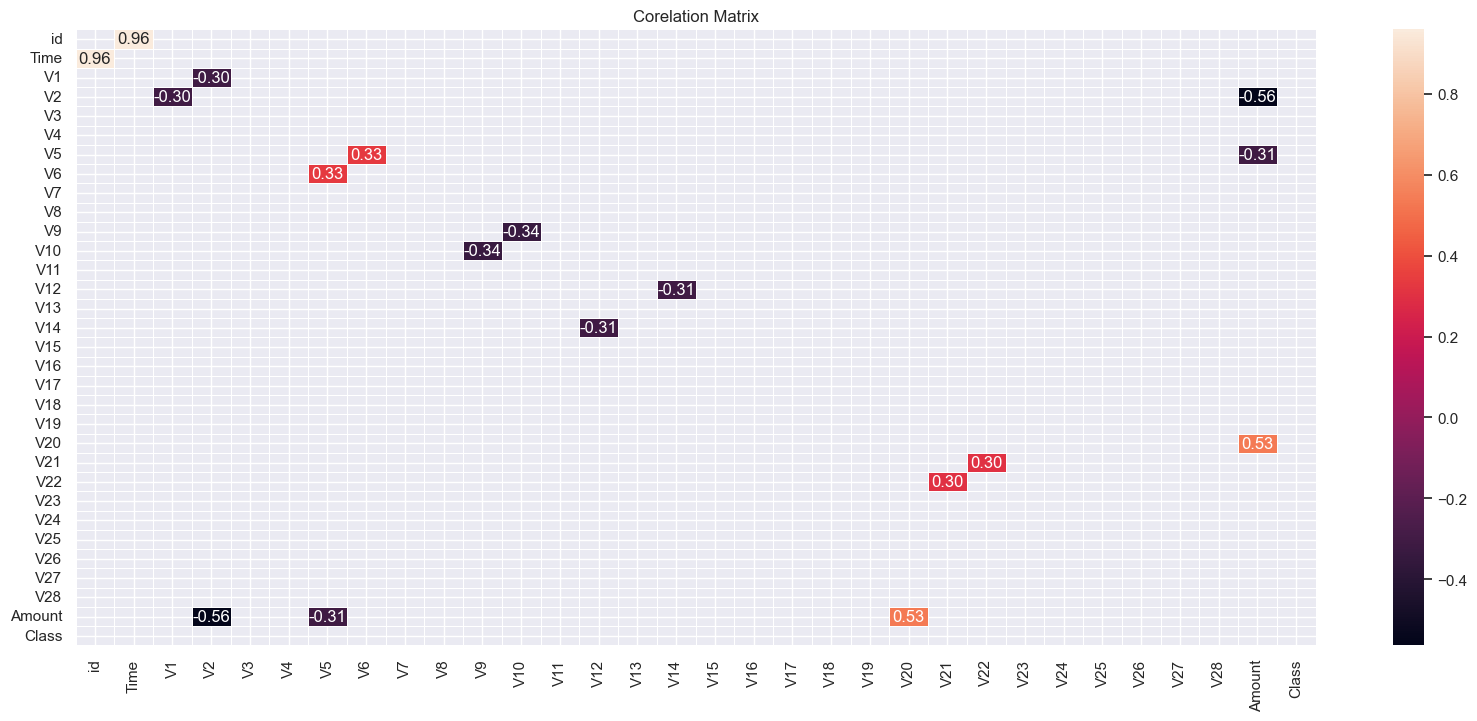

In [6]:
sns.set(rc={'figure.figsize':(20,8)})
corr = train_df.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Corelation Matrix')

In [9]:
test_df = pd.read_csv('test.csv')

In [10]:
y= train_df['Class']
X= train_df.drop(['id', 'Class'], axis=1)
test=test_df.drop(['id'], axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
test = pd.DataFrame(scaler.transform(test))

print('X shape:\t', X.shape)
print('Test shape:\t', test.shape)
print('Target Dataset shape:\t', y.shape)
print('train_df Null Values:\t', X.isnull().sum().sum())
print('Test_df Null Values:\t', test.isnull().sum().sum()) 

X shape:	 (219129, 30)
Test shape:	 (146087, 30)
Target Dataset shape:	 (219129,)
train_df Null Values:	 0
Test_df Null Values:	 0


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 1,shuffle=True)

In [13]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

C:\Users\noora\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [15]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [16]:
y_pred = model.predict(x_test)

In [17]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9967599142061789

In [21]:
pred = model.predict(test)

In [22]:
submission = pd.DataFrame({
    "id":test_df["id"],
    "Class":pred
})
submission.head()

id  Class
0  219129      0
1  219130      0
2  219131      0
3  219132      0
4  219133      0

In [23]:
submission.to_csv("submission.csv",index=False)